In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the DataSet

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

# EDA

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.dtypes.value_counts()
# 12 object dtypes,16 int values and 4 float values.

int64      16
object     12
float64     4
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()
# missing values are found in country,agent and company.
# company has more than 70% of null values which could be irrelevant for the model.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
df.describe()
#arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,agent,company,days_in_waiting_list and adr have large variations from the mean which indicates higher chance of error.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
pd.crosstab(df['booking_changes'],df['is_canceled'])

is_canceled,0,1
booking_changes,,
0,59923,41391
1,10894,1807
2,3039,766
3,783,144
4,309,67
5,98,20
6,45,18
7,28,3
8,13,4


In [ ]:
pd.crosstab(df['hotel'],df['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


In [ ]:
pd.crosstab(df['customer_type'],df['is_canceled'])

is_canceled,0,1
customer_type,,
Contract,2814,1262
Group,518,59
Transient,53099,36514
Transient-Party,18735,6389


In [ ]:
pd.crosstab(df['reservation_status'],df['is_canceled'])

is_canceled,0,1
reservation_status,,
Canceled,0,43017
Check-Out,75166,0
No-Show,0,1207


In [ ]:
pd.crosstab(df['hotel'],df['is_repeated_guest'])

is_repeated_guest,0,1
hotel,,
City Hotel,77298,2032
Resort Hotel,38282,1778


In [ ]:
pd.crosstab(df['hotel'],df['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
hotel,,,
City Hotel,66442,12868,20
Resort Hotel,38199,1719,142


In [ ]:
pd.crosstab(df['is_canceled'],df['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,74947,93,126
1,29694,14494,36


In [ ]:
pd.crosstab(df['is_canceled'],df['market_segment'])

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,185,646,4303,10672,7714,15908,35738,0
1,52,97,992,1934,12097,8311,20739,2


In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
# the percentage of booking canceled
data1 = df['is_canceled'].value_counts()
percentage_canceled = data1[1]/(data1[0]+data1[1]) * 100 
percentage_canceled

37.041628277075134

In [ ]:
pd.crosstab(df['hotel'],df['arrival_date_month'])
# Busiest month for the hotels is August

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
hotel,,,,,,,,,,,,
City Hotel,7480,8983,4132,4965,3736,8088,7894,6458,8232,4357,7605,7400
Resort Hotel,3609,4894,2648,3103,2193,4573,3045,3336,3559,2437,3555,3108


In [ ]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
def percentage_booking():
    a = df['arrival_date_year'].value_counts()
    p1 = a[2016]/(a.sum()) * 100
    p2 = a[2017]/(a.sum()) * 100
    p3 = a[2015]/(a.sum()) * 100
    return p1,p2,p3

In [ ]:
percentage_booking()
# 2016 has major bookings

(47.4972778289639, 34.07906859871011, 18.42365357232599)

In [ ]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

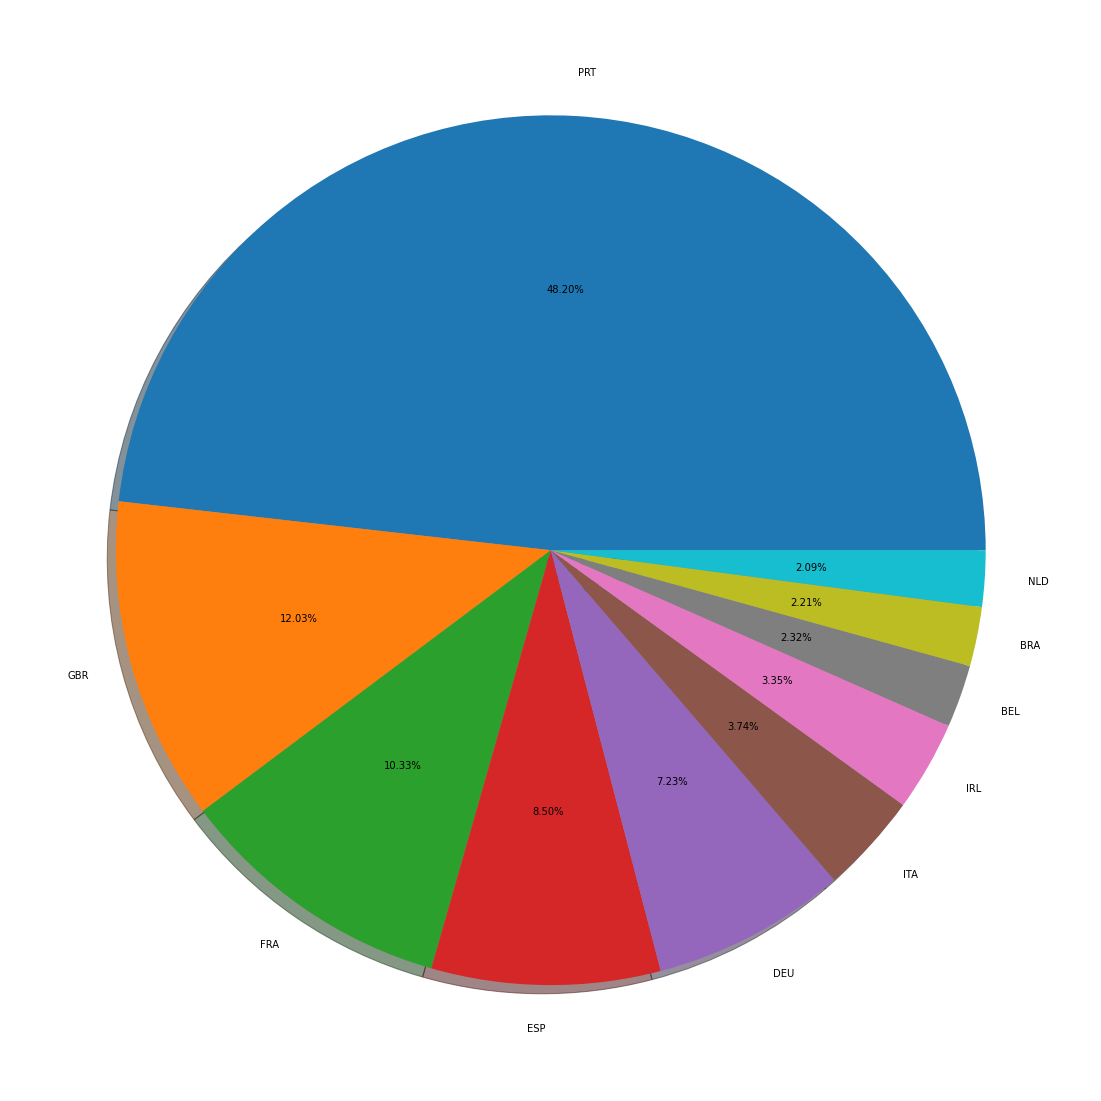

In [ ]:
plt.figure(figsize=(20,20))
l=df['country'].value_counts().nlargest(10)
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 10},autopct='%1.2f%%')
plt.show()
# portugal has highest booking

In [ ]:
total_nights = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
top10_nights = total_nights.value_counts().nlargest(10).sort_values(ascending=False)
top10_nights
# Highestbooking count has been made to 2 days interval

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
dtype: int64

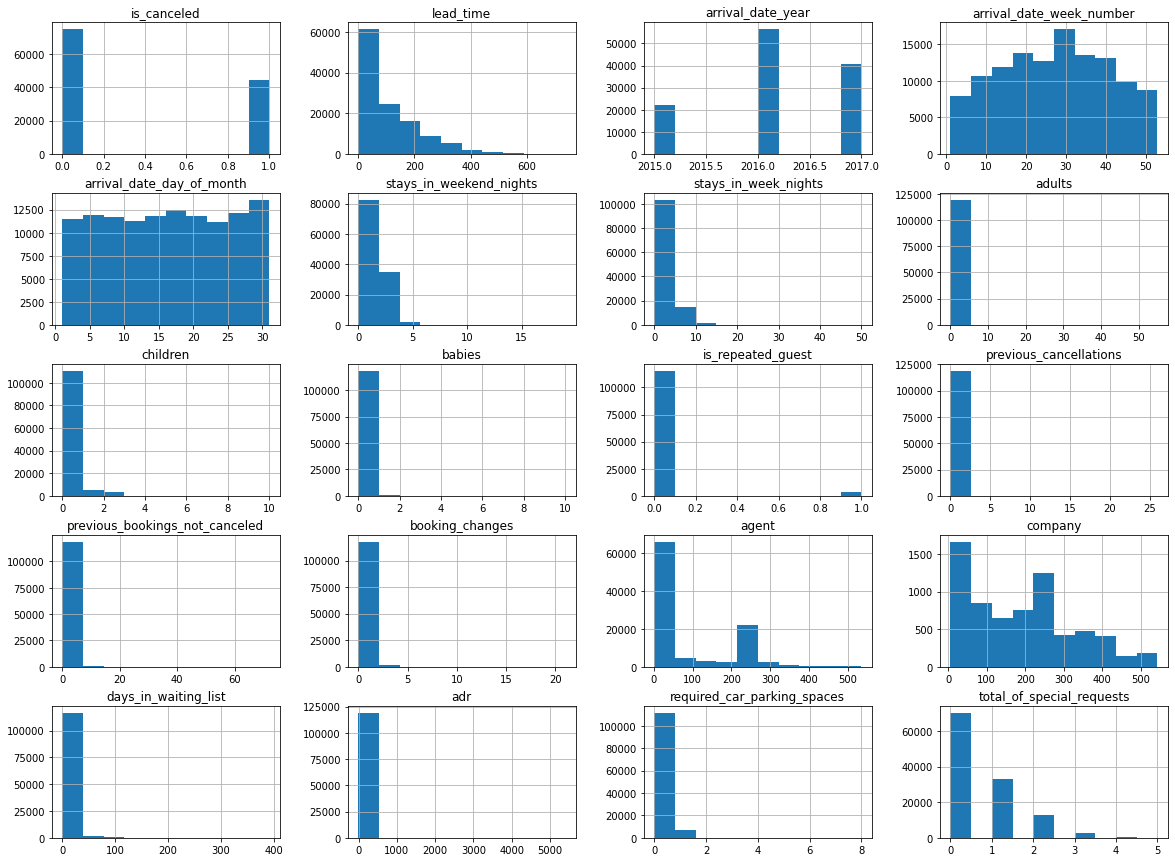

In [ ]:
frequency = df.select_dtypes(include=['float64','int64'])
frequency.hist(figsize=(20,15))
plt.show()


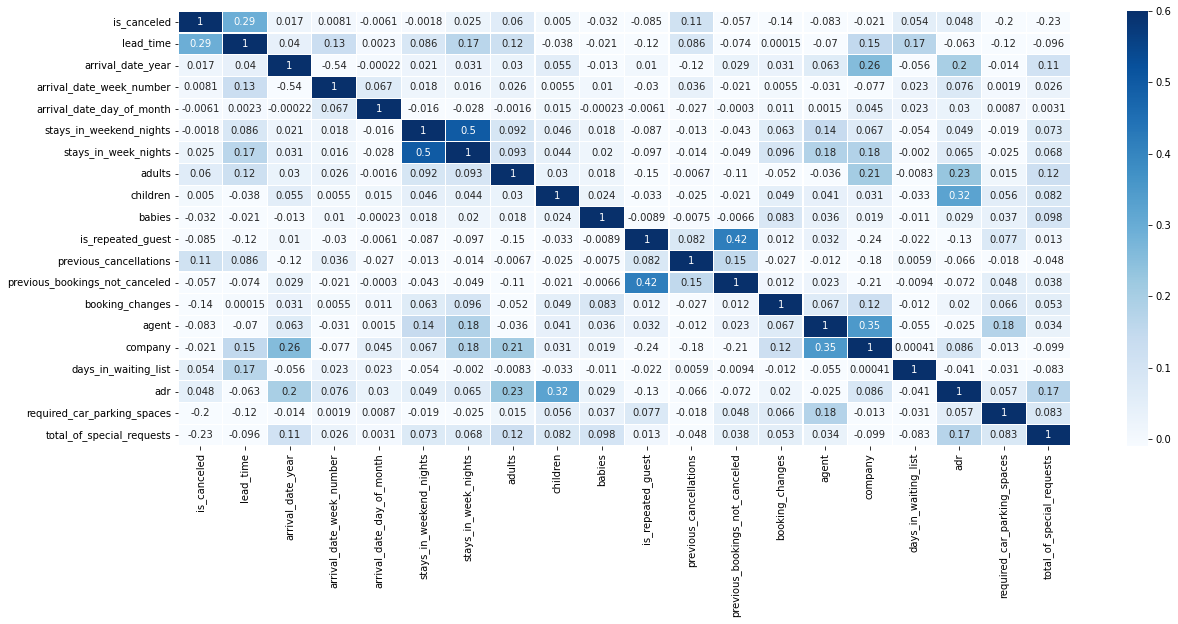

In [ ]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.01,vmax=0.6,annot=True,linewidths=0.2,cmap='Blues')

1.There is a extension in bookings to weekend nights
2.Cancelation for booking is likely to do not happen for the repeated guest.
3.We can not remove or neglect any feature depending on this correlation as there is no commandable correlation between multiple features.


# Preprocessing

Filling missing values

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Removing irrelevant features from dataset
df.drop(['company','reservation_status','reservation_status_date'],axis=1,inplace=True)

In [ ]:
# Filling the missing values
df['children'] = df['children'].fillna(df['children'].median())
df['agent'] = df['agent'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])


In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
a=['country']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

0         PRT
2         GBR
12        USA
13        ESP
15        IRL
         ... 
113817    KIR
113912    SDN
115334    ATF
117399    SLE
117943    LAO
Name: country, Length: 177, dtype: object


In [ ]:
df['country'].value_counts().nlargest(10)

135    49078
59     12129
56     10415
51      8568
43      7287
81      3766
76      3375
15      2342
25      2224
123     2104
Name: country, dtype: int64

In [ ]:
a=['hotel']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

In [ ]:
a=['meal']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    
#Undefined/SC – no meal package,BB–Bed & Breakfast,HB – Half board (breakfast and one other meal–usually dinner),FB – Full board (breakfast, lunch and dinner)

In [ ]:
a=['distribution_channel']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    
        

In [ ]:
a=['reserved_room_type']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
#definition

In [ ]:
a=['customer_type']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
  

In [ ]:
a=['market_segment']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])

In [ ]:
df['arrival_date_month']=df['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

In [ ]:
df.corr()['is_canceled'].sort_values(ascending=False)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

Checking outliers

In [ ]:
plt.boxplot(df['lead_time'])
plt.title("Boxplot of lead_time")
plt.show()

In [ ]:
index_values = df[(df['lead_time'] > 650)].index

In [ ]:
index_values.values

In [ ]:
df

In [ ]:
df.drop([1,4182],inplace = True,axis=0)


Feature Engineering

In [ ]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['kids'] = df['children'] + df['babies']
df['customers'] = df['kids'] + df['adults']
df["arrival_date"] = df['arrival_date_year'].astype(str) + '-' + df["arrival_date_month"].astype(str) + '-' + df["arrival_date_day_of_month"].astype(str)

In [ ]:
df['arrival_date']

In [ ]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'],format = '%Y-%m-%d' , errors = 'coerce')

In [ ]:
df['arrival_date']

In [ ]:
# Extracting date components from datetime
df['arrival_date:year'] = df['arrival_date'].dt.year
df['arrival_date:month'] = df['arrival_date'].dt.month
df['arrival_date:day'] = df['arrival_date'].dt.day


In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
y = df['is_canceled']
x = df.drop(['is_canceled','assigned_room_type','deposit_type','arrival_date_month','arrival_date_day_of_month','arrival_date_year','arrival_date','stays_in_weekend_nights','stays_in_week_nights','children','babies','adults','kids','meal'],axis=1)

In [ ]:
x.info()

Scaling

In [ ]:
#Standardization
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
x.describe()

Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
model=log_model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,f1_score
print('accuracy is: ',round(accuracy_score(y_test,y_pred),4))
print('Precision is: ',round(precision_score(y_test,y_pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,y_pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,y_pred,average='micro'),4))

In [ ]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

print('Accuracy :',accuracy_score(y_test,y_pred))
print("precision :",round(precision_score(y_test,y_pred,average="micro"),4))
print("Recall score :",round(recall_score(y_test,y_pred,average='micro'),4))
print("f1_score :",round(f1_score(y_test,y_pred,average='micro'),4))

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred,average='micro'))
print('recall score is: ',recall_score(y_test,y_pred,average='micro'))
print('f1 score is: ',f1_score(y_test,y_pred,average='micro'))

Fine Tuning and Feature importance

In [ ]:
x = x.rename(columns={0:'hotel', 1:'lead_time',
       2:'arrival_date_week_number',
       3:'country', 4:'market_segment',5:'distribution_channel',
       6:'is_repeated_guest', 7:'previous_cancellations',
       8:'previous_bookings_not_canceled', 9:'reserved_room_type',
        10:'booking_changes', 11:'agent',
       12:'days_in_waiting_list', 13:'customer_type', 14:'adr',
       15:'required_car_parking_spaces', 16:'total_of_special_requests',
       17:'total_nights', 18:'customers', 19:'arrival_date:year',
       20:'arrival_date:month',21:'arrival_date:day'})

In [ ]:
pd.Series(rf.feature_importances_,index = x.columns).sort_values(ascending =False)*100

In [ ]:
# Based on featureimportance  deleting the least important features and training the model.
y1 = df['is_canceled']
x1 = x.drop(['previous_bookings_not_canceled','days_in_waiting_list','is_repeated_guest'],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier


rf1 = RandomForestClassifier()
rf1.fit(x1_train, y1_train)
y_pred = rf1.predict(x1_test)

print('accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred,average='micro'))
print('recall score is: ',recall_score(y_test,y_pred,average='micro'))
print('f1 score is: ',f1_score(y_test,y_pred,average='micro'))

In [ ]:
#Defining prediction probability by setting threshold value
threshold = 0.8
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred1=(y_pred_prob>threshold).astype(int)
print(precision_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

In [ ]:
threshold = 0.6
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred1=(y_pred_prob>threshold).astype(int)
print(precision_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

In [ ]:
threshold = 0.4
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred1=(y_pred_prob>threshold).astype(int)
print(precision_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

In [ ]:
#Fine tuning hyperparameters
rft = RandomForestClassifier(n_estimators = 500,max_depth=15,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred2=rft.predict(x_test)
print(precision_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

In [ ]:
rft = RandomForestClassifier(n_estimators = 100,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred2=rft.predict(x_test)
print(precision_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

In [ ]:
rft = RandomForestClassifier(n_estimators = 550,max_depth=20,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred2=rft.predict(x_test)
print(precision_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))